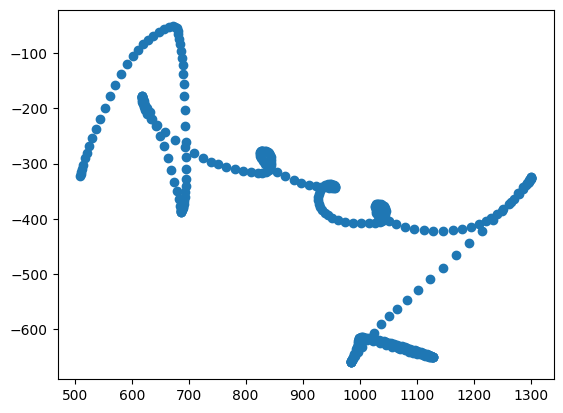

In [1]:
import numpy as np
import json

from plotting import plot_signals

from preprocess import preprocess

with open("data/signatures.txt") as f:
	signatures = json.load(f)
	np_signatures = np.array(signatures)

signals = [preprocess(np_signature) for np_signature in np_signatures]
plot_signals(signals)

signal = signals[0]

In [2]:
# !pip install --upgrade scipy==1.8.0
import scipy
print(scipy.__version__) # 1.8.0

1.8.0


In [3]:
print(len(signal.position),len(signal.velocity))

330 329


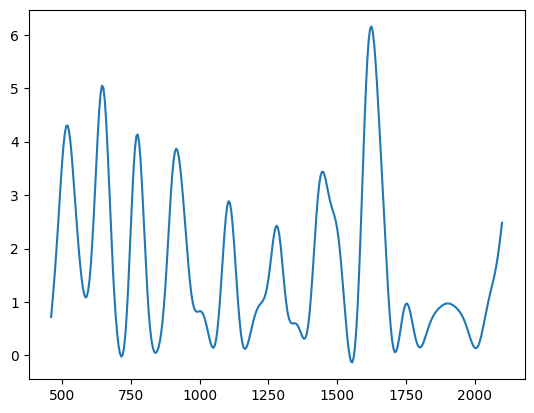

In [4]:
import matplotlib.pyplot as plt

plt.plot(signal.time[:-1],signal.speed)

['Point(role=2,idx=5,time=485.0,speed=2.4178092629565575,angle=5.029705699827004)', 'Point(role=3,idx=12,time=520.0,speed=4.303226723319164,angle=5.18903250005721)']
['Point(role=1,idx=0,time=460.0,speed=0.7180295750376625,angle=3.072919332717859)', 'Point(role=2,idx=5,time=485.0,speed=2.4178092629565575,angle=5.029705699827004)', 'Point(role=3,idx=12,time=520.0,speed=4.303226723319164,angle=5.18903250005721)', 'Point(role=4,idx=17,time=545.0,speed=3.0418514569439017,angle=5.37399051818184)', 'Point(role=5,idx=25,time=585.0,speed=1.0833692013285348,angle=7.005233558991916)']
LognormalStroke(D=383.0423043497579,t_0=273.305528208328,mu=5.528454926387512,sigma=0.1424931988919755,theta_s=4.941513064172169,theta_f=5.473958698521444)


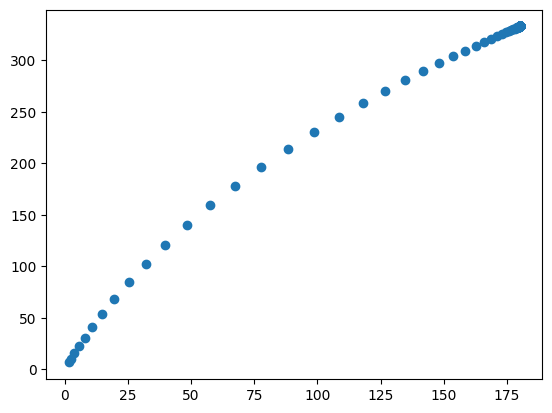

In [5]:
from speed_extract import extract_sigma_lognormal, get_point_combos, get_stroke_combos, mark_stroke_candidates

candidates=mark_stroke_candidates(signal)

candidate=candidates[0]
point_combos=get_point_combos(candidate)
point_combo = point_combos[0]
print([str(pt) for pt in point_combo])

stroke_combos = get_stroke_combos(candidate)
stroke_combo = stroke_combos[0]
print([str(pt) for pt in stroke_combo])

lognormal = extract_sigma_lognormal(point_combo,stroke_combo)
print(lognormal)
plot_signals([lognormal.signal(signal.time)])

In [6]:
np.array(1)/0

C:\Users\dooli\AppData\Local\Temp\ipykernel_17992\1427113717.py:1: RuntimeWarning: divide by zero encountered in true_divide
  np.array(1)/0


inf

c:\Users\dooli\Documents\lognormal\speed_extract.py:164: RuntimeWarning: divide by zero encountered in log
  exponent = (( np.log(delta(pt)) - mu )**2) / (2*sigma_sq)
c:\Users\dooli\Documents\lognormal\speed_extract.py:165: RuntimeWarning: invalid value encountered in double_scalars
  return pt.speed * sigma*np.sqrt(2*np.pi)*delta(pt) * np.exp( exponent )
c:\Users\dooli\Documents\lognormal\lognormal.py:22: RuntimeWarning: divide by zero encountered in log
  ret=(np.log(delta)-self.mu)/(np.sqrt(2)*self.sigma)
c:\Users\dooli\Documents\lognormal\lognormal.py:22: RuntimeWarning: invalid value encountered in log
  ret=(np.log(delta)-self.mu)/(np.sqrt(2)*self.sigma)
c:\Users\dooli\Documents\lognormal\speed_extract.py:177: RuntimeWarning: divide by zero encountered in double_scalars
  delta_theta = (p2.angle-p4.angle)/(fraction_done(p2)-fraction_done(p4))
c:\Users\dooli\Documents\lognormal\speed_extract.py:180: RuntimeWarning: invalid value encountered in double_scalars
  theta_s = p3.angle +

['LognormalStroke(D=383.0423043497579,t_0=273.305528208328,mu=5.528454926387512,sigma=0.1424931988919755,theta_s=4.941513064172169,theta_f=5.473958698521444)', 'LognormalStroke(D=353.4059154808168,t_0=382.05252138733044,mu=4.941885167342305,sigma=0.22812530263351782,theta_s=4.94383010575775,theta_f=5.4371998411049685)', 'LognormalStroke(D=296.05116368150397,t_0=450.2177404001252,mu=4.3805200069674886,sigma=0.3676141862927106,theta_s=5.0050575017840755,theta_f=5.481087681628399)', 'LognormalStroke(D=324.30446885646626,t_0=106.03729862654166,mu=6.29179992313417,sigma=0.04640640362887411,theta_s=7.795414828696964,theta_f=7.903076136781865)', 'LognormalStroke(D=333.07152920065323,t_0=170.20925825195275,mu=6.165649577406143,sigma=0.052685242159892794,theta_s=7.795623979792712,theta_f=7.9033290791745205)', 'LognormalStroke(D=322.2840188001164,t_0=491.3476495019454,mu=5.061451826921168,sigma=0.1635825196031285,theta_s=7.79919732547368,theta_f=7.907899581240104)', 'LognormalStroke(D=374.399050

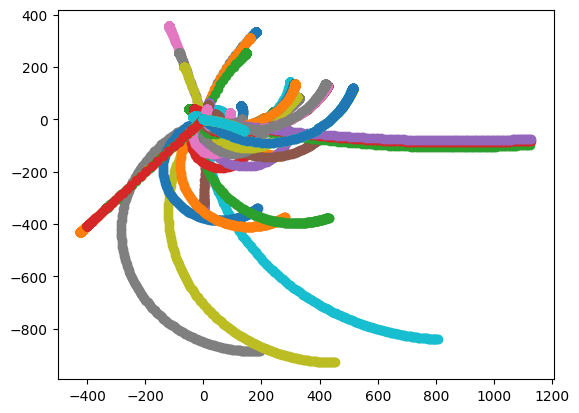

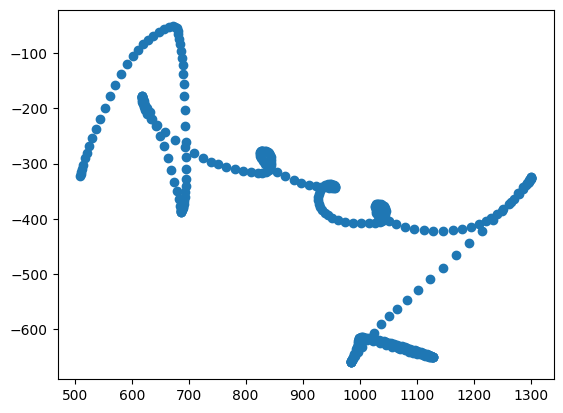

In [7]:
from speed_extract import extract_all_lognormals


lognormals = extract_all_lognormals(signal)
plot_signals([lgn.signal(signal.time) for lgn in lognormals])
plot_signals([signal])

In [8]:
from beam_search import BeamSearch
from action_plan import ActionPlan

top_k = 10
snr_threshold = 40 # I have no idea what to say for this.
max_strokes = 14
search = BeamSearch(signal,top_k,snr_threshold,max_strokes)

demo_plan = ActionPlan([],signal.position[0])

suggest_plans = search.get_next_action_plans([demo_plan])

#out_stroke = search.search()

c:\Users\dooli\Documents\lognormal\speed_extract.py:126: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sq=-2 + 2*l_ratio + 1/(2*l_ratio)
c:\Users\dooli\Documents\lognormal\speed_extract.py:140: RuntimeWarning: invalid value encountered in double_scalars
  exponent=sigma/2 * (np.sqrt(sigma_sq+4) - 3*sigma)


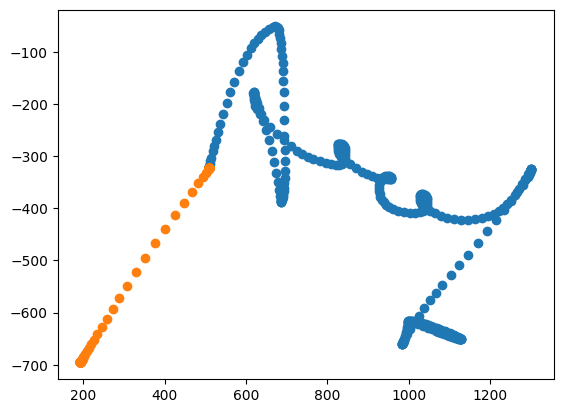

In [9]:
suggest_plan = suggest_plans[0]
plot_signals([signal,suggest_plan.signal(signal.time)])